# D214 Capstone
# Modeling Inflation Adusted Recessionary Lumber Prices
# Early 2000's Recession
## Eric Yarger

# Import Packages

In [1]:
# Import Initial Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.tsa.stattools import adfuller
import statsmodels
import datetime
import platform
from pmdarima.arima import ndiffs
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.graphics.tsaplots import plot_pacf
import warnings
from scipy import signal
from pmdarima.arima import StepwiseContext
from pmdarima.arima import auto_arima
from pmdarima.model_selection import train_test_split

### Environment

In [2]:
# Windows 10, Anaconda, JupyterLab, JupyterNotebook
# Jupyter environment version
!jupyter --version

Selected Jupyter core packages...
IPython          : 7.31.1
ipykernel        : 6.15.2
ipywidgets       : not installed
jupyter_client   : 7.3.5
jupyter_core     : 4.10.0
jupyter_server   : 1.18.1
jupyterlab       : 3.4.4
nbclient         : 0.5.13
nbconvert        : 6.4.4
nbformat         : 5.5.0
notebook         : 6.4.12
qtconsole        : not installed
traitlets        : 5.1.1


In [3]:
# Python Version
print(platform.python_version())

3.7.13


In [4]:
#Load Medical Dataset 
df = pd.read_csv('C:/Users/ericy/Desktop/lumber_trading_days_adj.csv')

# Data Selection for Analysis

In [5]:
#------ Select Data Set for Recession
df = df[6630:7324]

In [6]:
df

,Date,Trading Days,2022_Value,Value
6630,1999-03-03,6631,562.408,338.8
6631,1999-03-04,6632,558.590,336.5
6632,1999-03-05,6633,566.392,341.2
6633,1999-03-08,6634,567.222,341.7
6634,1999-03-09,6635,557.096,335.6
...,...,...,...,...
7319,2001-11-27,7320,348.226,221.8
7320,2001-11-28,7321,355.448,226.4
7321,2001-11-29,7322,356.390,227.0
7322,2001-11-30,7323,349.953,222.9


# D1: Exploratory Data Analysis

In [7]:
df = df[['Trading Days','2022_Value']]

In [8]:
df

,Trading Days,2022_Value
6630,6631,562.408
6631,6632,558.590
6632,6633,566.392
6633,6634,567.222
6634,6635,557.096
...,...,...
7319,7320,348.226
7320,7321,355.448
7321,7322,356.390
7322,7323,349.953


# EDA

In [9]:
df.head()

,Trading Days,2022_Value
6630,6631,562.408
6631,6632,558.590
6632,6633,566.392
6633,6634,567.222
6634,6635,557.096


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694 entries, 6630 to 7323
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Trading Days  694 non-null    int64  
 1   2022_Value    694 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 11.0 KB


In [11]:
df.shape

(694, 2)

In [12]:
df.describe()

,Trading Days,2022_Value
count,694.000000,694.000000
mean,6977.500000,475.437570
std,200.484829,93.310951
min,6631.000000,305.365000
25%,6804.250000,380.024750
50%,6977.500000,484.454900
75%,7150.750000,554.772000
max,7324.000000,684.517600


In [13]:
df.isnull().any()

Trading Days    False
2022_Value      False
dtype: bool

## Line Graph Visualization

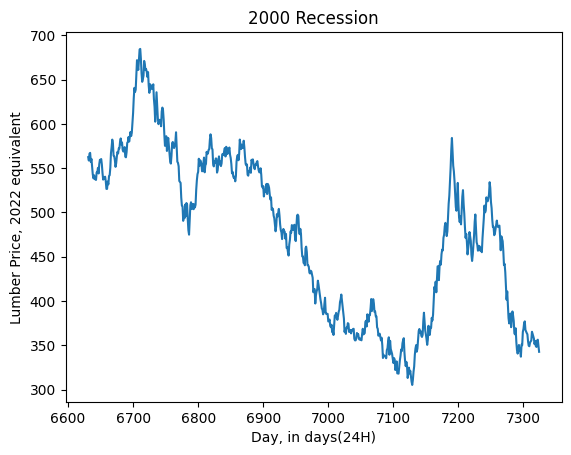

In [14]:
#-------
plt.plot(df['Trading Days'],df['2022_Value'])
plt.title('2000 Recession')
plt.xlabel('Day, in days(24H)')
plt.ylabel('Lumber Price, 2022 equivalent')
plt.show()

# Data Cleaning

In [15]:
# Drop any null columns
df = df.dropna()

# D2: Time Step Formatting, Indexing



### Set df['Trading Days'] to Index

In [16]:
# Day to datetime
df['Trading Days'] = pd.to_datetime(df['Trading Days'], unit='D')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 694 entries, 6630 to 7323
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Trading Days  694 non-null    datetime64[ns]
 1   2022_Value    694 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 16.3 KB


In [18]:
# Set Day as Index
df.set_index('Trading Days',inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 694 entries, 1988-02-27 to 1990-01-20
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   2022_Value  694 non-null    float64
dtypes: float64(1)
memory usage: 10.8 KB


In [20]:
df

,2022_Value
Trading Days,
1988-02-27,562.408
1988-02-28,558.590
1988-02-29,566.392
1988-03-01,567.222
1988-03-02,557.096
...,...
1990-01-16,348.226
1990-01-17,355.448
1990-01-18,356.390


# D3 Stationarity Analysis
### Augmented Dickey Fuller (ADF) Test
### Assess stationarity of dataset

In [21]:
# Code Reference (Making time series stationary | Python, n.d.)
dicky_fuller_test = adfuller(df)

In [22]:
dicky_fuller_test

(-1.108102894290722,
 0.7118297706953935,
 2,
 691,
 {'1%': -3.4398489271901713,
  '5%': -2.8657317673059395,
  '10%': -2.569002221596252},
 4756.26141939622)

In [23]:
# Results show p = .71183
# Data does not reject null hypothesis at p < .05
# Therefore, Time series is determined to be non-stationary

# D4 Differencing
## 1st and 2nd order Differencing
### finding 'd' for ARIMA model

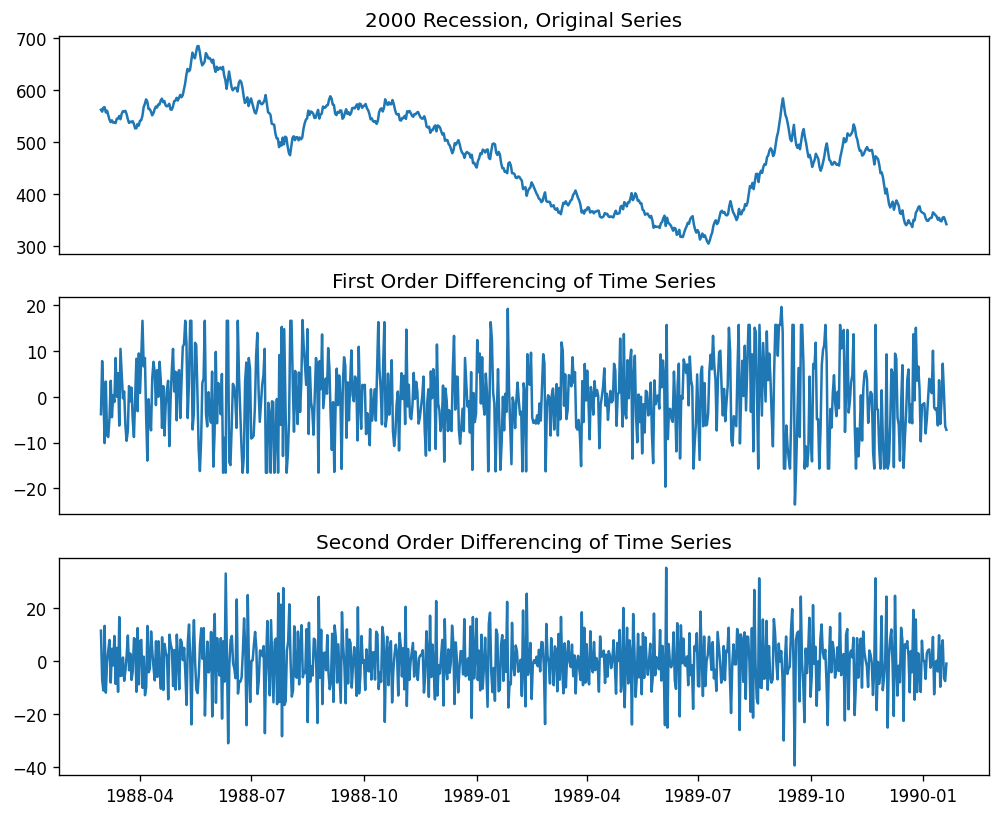

In [24]:
# Set plot parameters for multi-ax subplots
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':120})
 
# Establish that there are three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3)

# Plot the original dataset 
ax1.plot(df); ax1.set_title('2000 Recession, Original Series'); ax1.axes.xaxis.set_visible(False)

# First Order differencing of Time Series 
ax2.plot(df.diff()); ax2.set_title('First Order Differencing of Time Series'); ax2.axes.xaxis.set_visible(False)

# Second Order Differencing of Time Series
ax3.plot(df.diff().diff()); ax3.set_title('Second Order Differencing of Time Series')

# Plot all three graphs
plt.show()

In [25]:
# Using pmdarima's ndiffs to find differencing term
# Code reference (Verma, 2021)

kpss_diffs = ndiffs(df, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(df, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"Estimated differencing term: {n_diffs}")

Estimated differencing term: 1


# D5 Seasonality Analysis

In [26]:
# Code Reference (Boston, 2020)
result = seasonal_decompose(df)

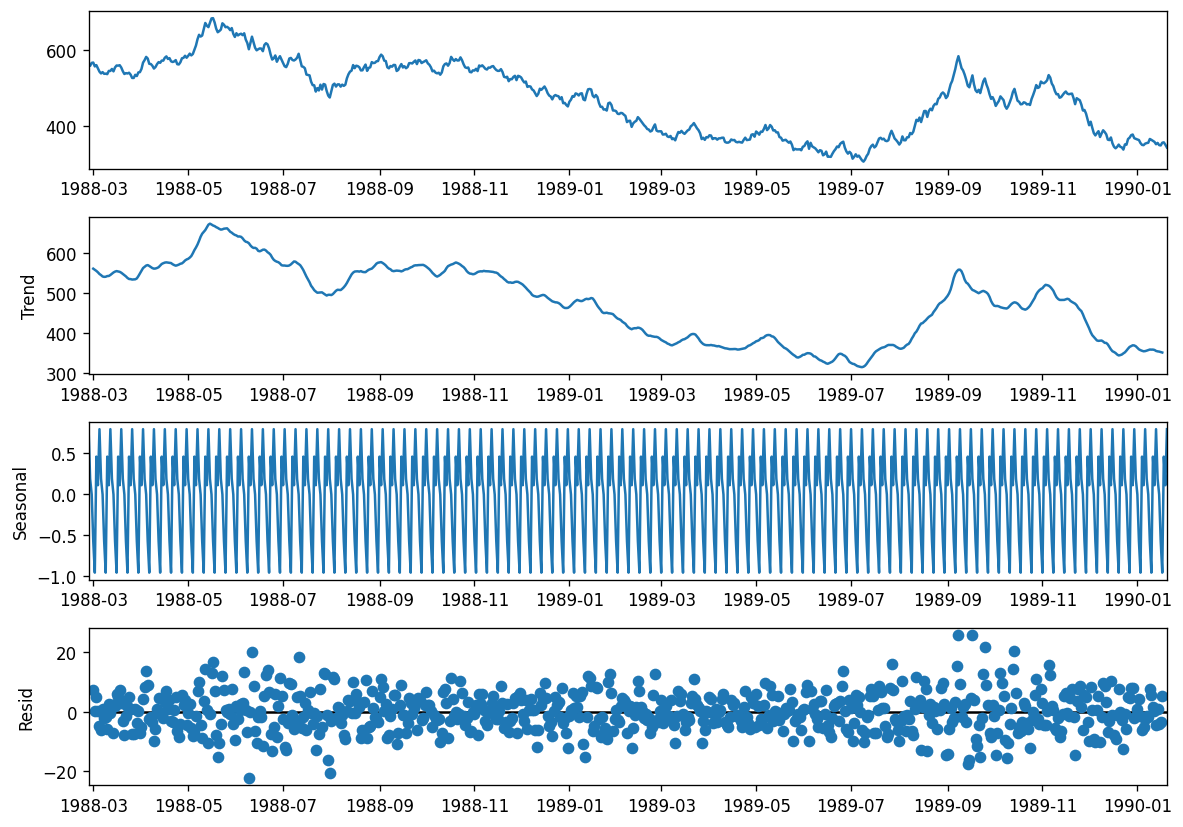

In [27]:
# plotting the result of our seasonal decomposition from the step above
rcParams['figure.figsize'] = 10,7
result.plot();

# D6 ACF and PACF

## Finding order of MA term 'q'
### Using Autocorrelation function (ACF)

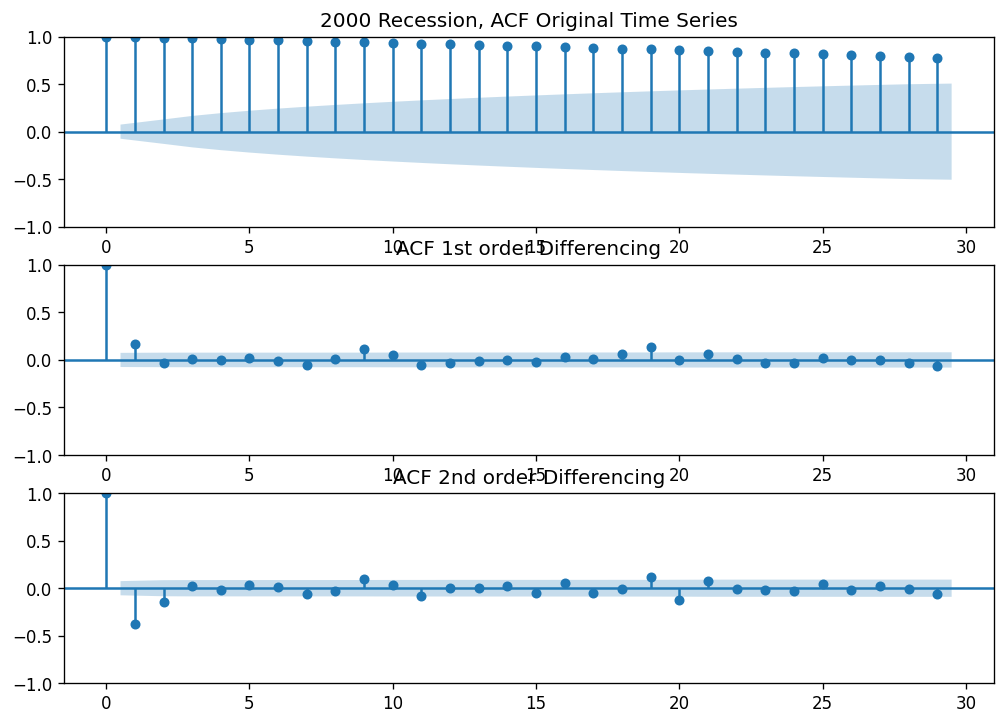

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(df, ax=ax1, title='2000 Recession, ACF Original Time Series');
plot_acf(df.diff().dropna(), ax=ax2, title='ACF 1st order Differencing');
plot_acf(df.diff().diff().dropna(), ax=ax3, title='ACF 2nd order Differencing');

## Finding order of AR term 'p'
### Using Partial autocorrelation (PACF)

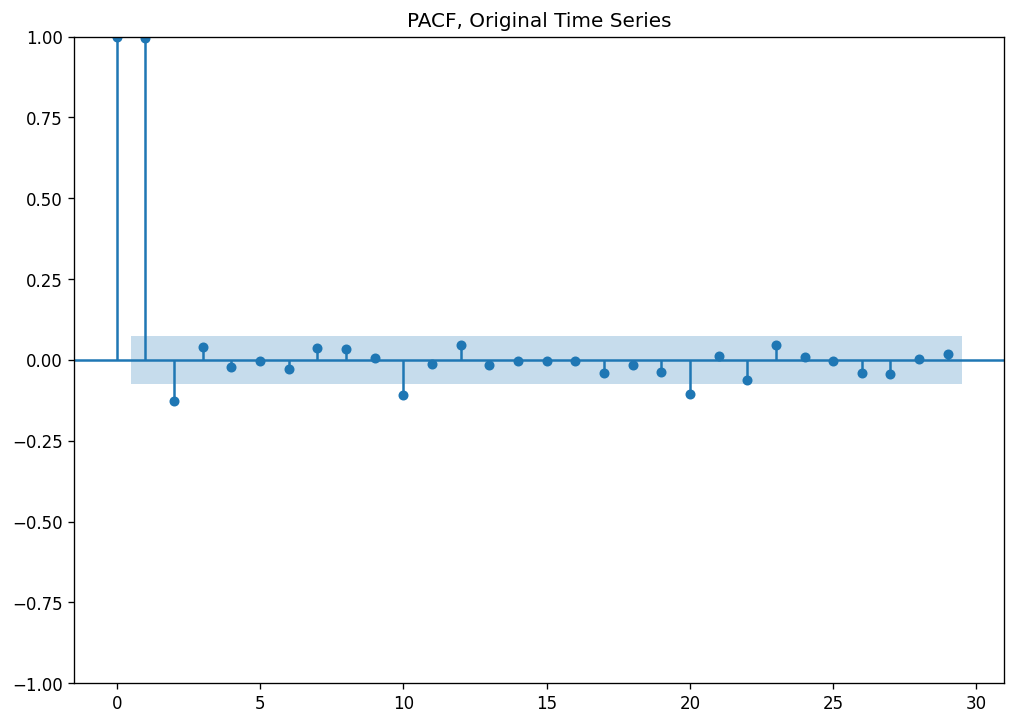

In [29]:
warnings.filterwarnings("ignore")
plot_pacf(df.dropna(), title='PACF, Original Time Series');

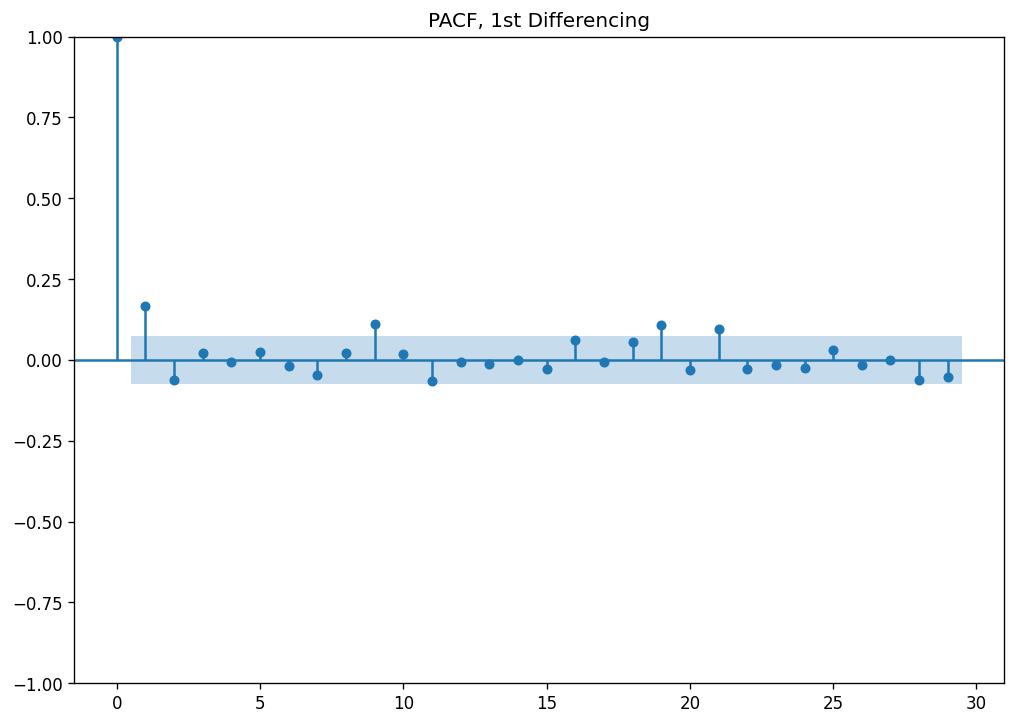

In [30]:
plot_pacf(df.diff().dropna(), title='PACF, 1st Differencing');

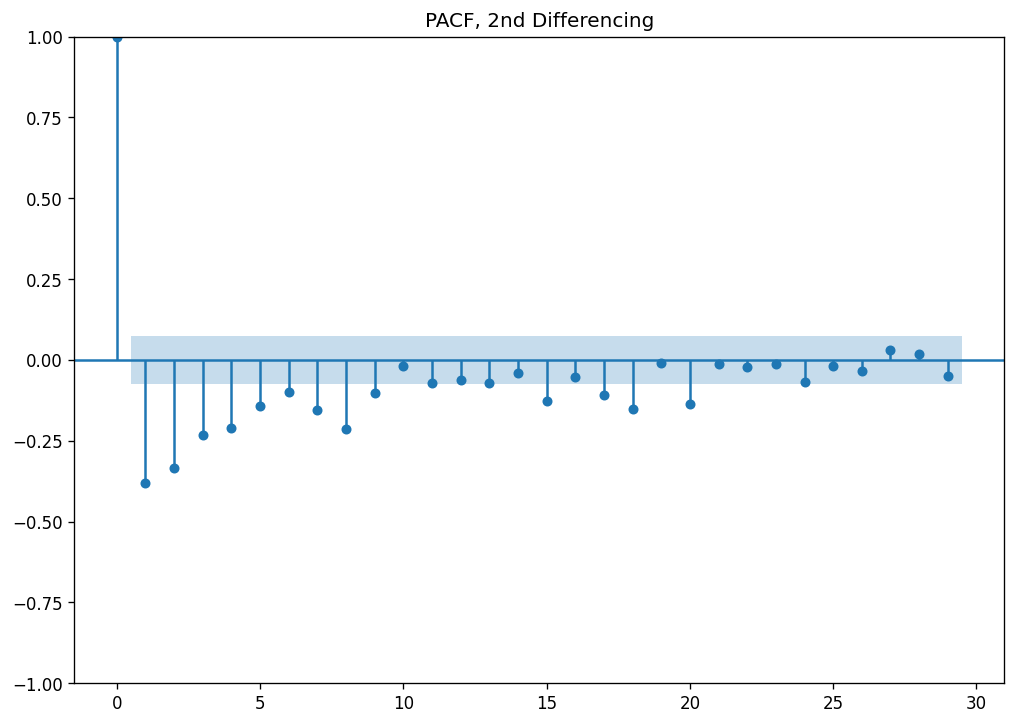

In [31]:
plot_pacf(df.diff().diff().dropna(), title='PACF, 2nd Differencing');

# D7 Spectral Density

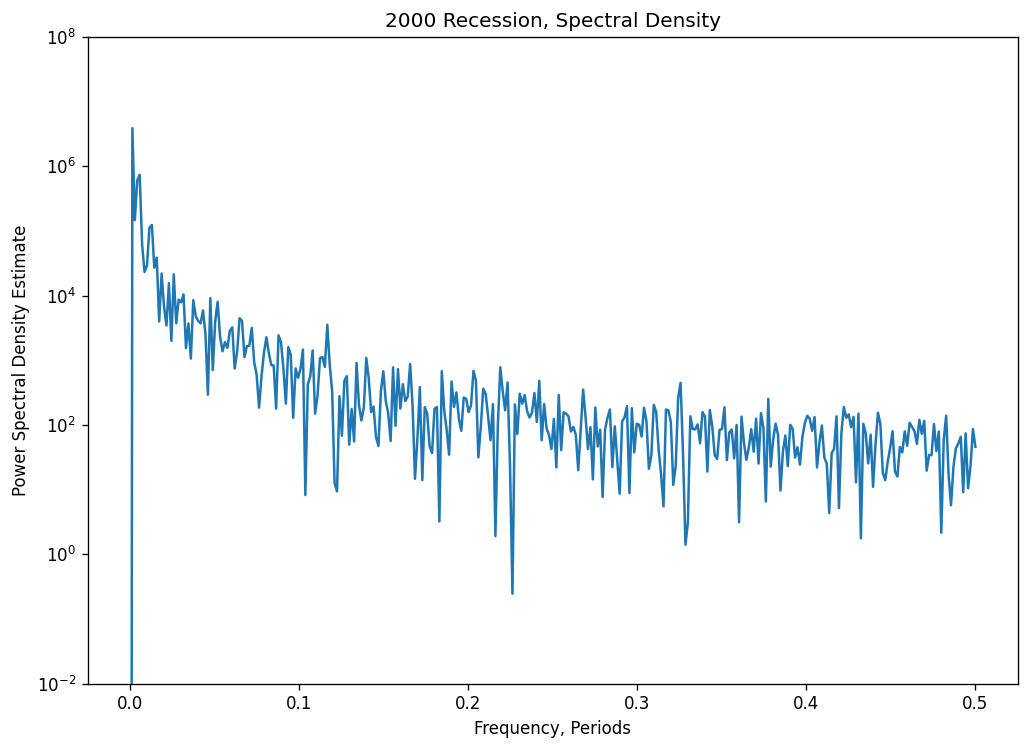

In [32]:
# Code Reference (Festus, 2022)

# signal periodogram
f, Pxx_den = signal.periodogram(df['2022_Value'])

# plotting semilogy - pyplot module used to make a plot with log scaling on the y-axis
plt.semilogy(f, Pxx_den)

# Setting coordinate values and titles for Spectral Density Graph
# setting y-axis min and max value
plt.ylim(1e-2, 1e8)

# Graph Title
plt.title('2000 Recession, Spectral Density')

# X label for Periods
plt.xlabel('Frequency, Periods')

# Y Label for SD Estimate
plt.ylabel('Power Spectral Density Estimate')
plt.show()

# D8 Create Train/Test Datasets

## Dataset Size = 694 cases
## 80/20 Train/Test Split
## Split is 555 / 139

In [33]:
# ------Splitting data into Test and Train sets using pmdarima's train_test_split
# code reference (Smith, 2019)

train, test = train_test_split(df, train_size=555)

In [34]:
train

,2022_Value
Trading Days,
1988-02-27,562.408
1988-02-28,558.590
1988-02-29,566.392
1988-03-01,567.222
1988-03-02,557.096
...,...
1989-08-30,484.188
1989-08-31,473.355
1989-09-01,478.536


In [35]:
test

,2022_Value
Trading Days,
1989-09-04,518.885
1989-09-05,534.585
1989-09-06,550.285
1989-09-07,569.910
1989-09-08,584.040
...,...
1990-01-16,348.226
1990-01-17,355.448
1990-01-18,356.390


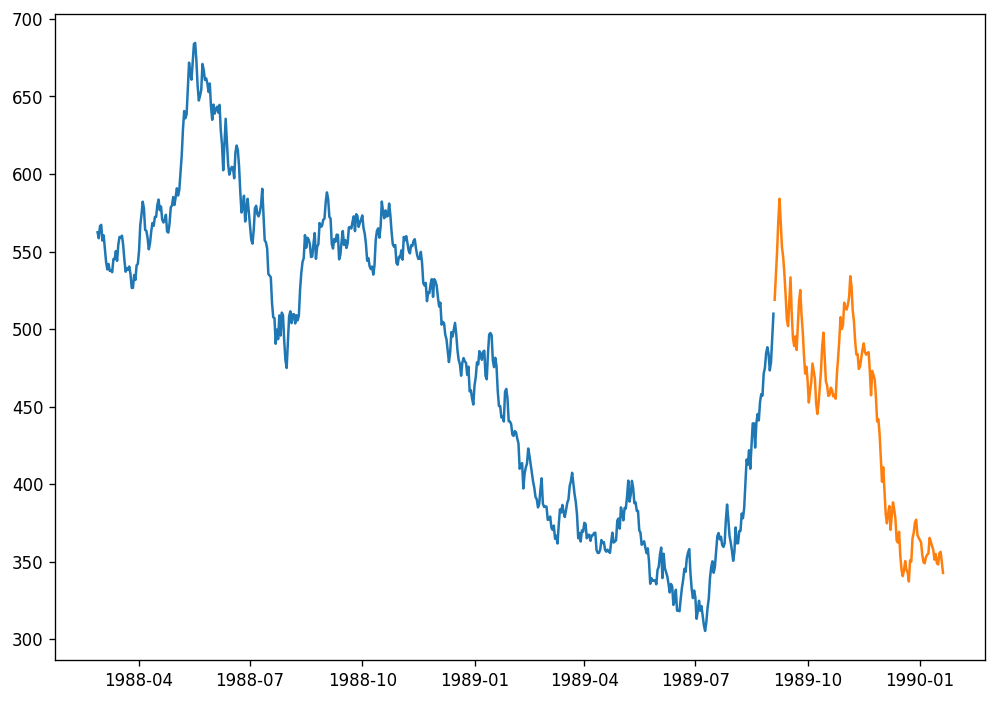

In [36]:
# Plot training data
plt.plot(train)

# Plot Test Data
plt.plot(test)

In [37]:
print(train.shape)
print(test.shape)

(555, 1)
(139, 1)


# D9 Auto-arima ARIMA Modeling
## Using pmdarima's auto_arima

In [38]:
# Fit the model using auto_arima
# Auto-arima code reference (6. Tips to using auto_arima — pmdarima 2.0.1 documentation, n.d.)
# Additional code reference (Pmdarima.arima.AutoARIMA — pmdarima 2.0.1 documentation, n.d.)
# Auto-arima, initial parameter attempt
# Code Reference (Kosaka, 2021)

# Establish auto_arima to run ARIMA and take into account
# Any Seasonality of the data, and any trends found.
model = auto_arima(train, start_p=1, start_q=1,
                   test='adf',
                   max_p=3,
                   max_q=3,
                   max_d=3,
                   seasonal=True,
                   stationarity=False,
                   seasonal_test='ocsb',
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True,
                  trend='c')

# Print Summary of Best AIC Minimized SARIMAX Model
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3862.344, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3866.355, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3862.726, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3861.975, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3866.355, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3862.305, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3864.237, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3861.975, Time=0.06 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.765 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  555
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -1927.988
Date:                Tue, 18 Oct 2022   AIC                           3861.975
Time:                        13:18:0

In [68]:
model = auto_arima(train, trace=True)

# Print Summary of Best AIC Minimized SARIMAX Model
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3866.240, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3866.355, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3862.726, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3861.975, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3864.435, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3862.344, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3862.305, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3864.237, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3860.037, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3860.412, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3860.380, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3860.788, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3862.309, Time=0.10 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.186 seconds
                      

In [40]:
model.conf_int()

,0,1
ma.L1,0.037453,0.191373
sigma2,53.797337,69.622658


# Visualizing Model Results

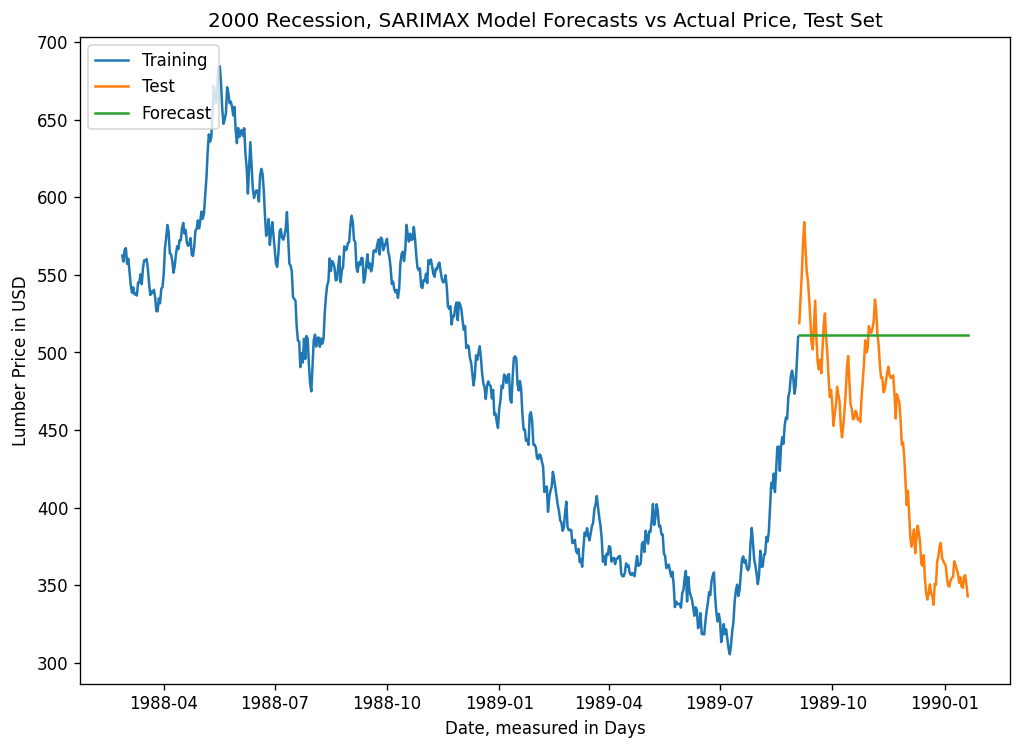

In [41]:
# Prediction assignment, predicted revenue column named
# Training, Test, and Predicted data plotted together
# Code Reference (Matplotlib.pyplot.plot — Matplotlib 3.6.0 documentation, n.d.)

# ------Creating varible with forecast values
forecast = pd.DataFrame(model.predict(n_periods = 139))

# Naming forecast_revenue column in forecast variable
forecast.columns = ['forecast_prices']

# Establish plot parameters for Forecast

# Plot figure size
plt.figure(figsize=(10,7))

# Training data
plt.plot(train,label="Training")

# Annotate X-axis label
plt.xlabel('Date, measured in Days')

# Annotate Y-axis label
plt.ylabel('Lumber Price in USD')

# Annotate Plot Title
plt.title('2000 Recession, SARIMAX Model Forecasts vs Actual Price, Test Set')

# Plot Test Data
plt.plot(test,label="Test")

# Plot Forecast Data
plt.plot(forecast,label="Forecast")

# Plot legend in upper lefthand corner
plt.legend(loc = 'upper left')

# Show Plot
plt.show()

In [42]:
forecast

,forecast_prices
1989-09-04,511.536298
1989-09-05,511.536298
1989-09-06,511.536298
1989-09-07,511.536298
1989-09-08,511.536298
...,...
1990-01-16,511.536298
1990-01-17,511.536298
1990-01-18,511.536298
1990-01-19,511.536298


# D10 Accuracy Metrics for our forecast

In [43]:
# RMSE and MAE to test model accuracy

In [44]:
# Create array of actual Revenue values, stored in Test variable

test_array = test[['2022_Value']].to_numpy()
#test_array

In [45]:
test_array.shape

(139, 1)

In [46]:
forecast

,forecast_prices
1989-09-04,511.536298
1989-09-05,511.536298
1989-09-06,511.536298
1989-09-07,511.536298
1989-09-08,511.536298
...,...
1990-01-16,511.536298
1990-01-17,511.536298
1990-01-18,511.536298
1990-01-19,511.536298


In [47]:
# Predictions to numpy array
predicted_array = forecast[['forecast_prices']].to_numpy()

In [48]:
predicted_array.shape

(139, 1)

In [49]:
#RMSE Calculation

rmse = sqrt(mean_squared_error(test_array, predicted_array))
print ('RMSE = ' + str(rmse))

RMSE = 95.71276638539831


In [50]:
# MAE Calculation

def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

true = test_array
predicted = predicted_array

print(mae(true, predicted))

75.1690398533788


# D11 Visualizing Model Forecast Confidence Intervals at 20% CI

In [51]:
# Model Standard Error calculations, computed numerical Hessian

std_error = model.bse()
print(std_error)

ma.L1     0.039266
sigma2    4.037146
dtype: float64


In [52]:
# Generate Model confidence intervals

conf_int = model.conf_int()

In [53]:
# ------Generate Forecast Prediction Intervals at 90% Confidence

y_forec, conf_int = model.predict(139, return_conf_int=True, alpha=0.8)
print(conf_int)

[[509.54611213 513.52648449]
 [508.55638617 514.51621045]
 [507.82160967 515.25098695]
 [507.20987404 515.86272259]
 [506.67451034 516.39808629]
 [506.19251523 516.8800814 ]
 [505.75053536 517.32206127]
 [505.34000198 517.73259465]
 [504.95502764 518.11756898]
 [504.59136066 518.48123596]
 [504.24581175 518.82678487]
 [503.9159158  519.15668082]
 [503.59972065 519.47287597]
 [503.29564905 519.77694757]
 [503.00240497 520.07019165]
 [502.71890806 520.35368856]
 [502.4442465  520.62835013]
 [502.17764234 520.89495428]
 [501.91842553 521.15417109]
 [501.66601401 521.40658261]
 [501.41989838 521.65269824]
 [501.17962979 521.89296683]
 [500.94481031 522.12778632]
 [500.71508519 522.35751144]
 [500.49013659 522.58246003]
 [500.26967841 522.80291822]
 [500.053452   523.01914462]
 [499.84122265 523.23137397]
 [499.63277656 523.43982006]
 [499.42791835 523.64467828]
 [499.22646888 523.84612775]
 [499.02826345 524.04433317]
 [498.83315022 524.2394464 ]
 [498.64098883 524.4316078 ]
 [498.45164921

In [54]:
# Assign Predictions to pandas DataFrame

conf_pd = pd.DataFrame(conf_int, columns =['Low_Prediction','High_Prediction'])

#Assign Low predictions to variable
low_prediction = conf_pd['Low_Prediction']

#Assign High predictions to variable
high_prediction = conf_pd['High_Prediction']

In [55]:
# Read out Test and Train sets to csv file
# Open csv files in Google Sheets, Add Day Column
# Dates align with 'test' variable, which contains actual revenue figures

low_prediction.to_csv('C:/Users/ericy/Desktop/Low_Prediction.csv')
high_prediction.to_csv('C:/Users/ericy/Desktop/High_Prediction.csv')

In [56]:
#-----Load predictions, date column added

low_pred = pd.read_csv('C:/Users/ericy/Desktop/2000_Low_Prediction.csv')
high_pred = pd.read_csv('C:/Users/ericy/Desktop/2000_High_Prediction.csv')

In [57]:
# Variable exploration to ensure compatability with 'test' datetime timeframe
low_pred

,Date,Low_Prediction
0,1989-09-04,509.546112
1,1989-09-05,508.556386
2,1989-09-06,507.821610
3,1989-09-07,507.209874
4,1989-09-08,506.674510
...,...,...
134,1990-01-16,485.785345
135,1990-01-17,485.690010
136,1990-01-18,485.595025
137,1990-01-19,485.500387


In [58]:
# Variable exploration to ensure compatability with 'test' datetime timeframe
high_pred

,Date,High_Prediction
0,1989-09-04,513.526485
1,1989-09-05,514.516210
2,1989-09-06,515.250987
3,1989-09-07,515.862723
4,1989-09-08,516.398086
...,...,...
134,1990-01-16,537.287251
135,1990-01-17,537.382586
136,1990-01-18,537.477571
137,1990-01-19,537.572210


## Convert Low and High Prediction 'Day' column to datetime and index

In [59]:
# Lower Predictions, Set Day as Index
low_pred['Date'] = pd.to_datetime(low_pred['Date'])

In [60]:
low_pred.set_index('Date',inplace=True)

In [61]:
# High Predictions, Day to datetime
high_pred['Date'] = pd.to_datetime(high_pred['Date'])

In [62]:
# High Predictions, Set Day as Index
high_pred.set_index('Date',inplace=True)

In [63]:
low_pred

,Low_Prediction
Date,
1989-09-04,509.546112
1989-09-05,508.556386
1989-09-06,507.821610
1989-09-07,507.209874
1989-09-08,506.674510
...,...
1990-01-16,485.785345
1990-01-17,485.690010
1990-01-18,485.595025


In [64]:
high_pred

,High_Prediction
Date,
1989-09-04,513.526485
1989-09-05,514.516210
1989-09-06,515.250987
1989-09-07,515.862723
1989-09-08,516.398086
...,...
1990-01-16,537.287251
1990-01-17,537.382586
1990-01-18,537.477571


# SARIMAX Model Forecast, With Confidence Interval = 20%, Vs Test Set

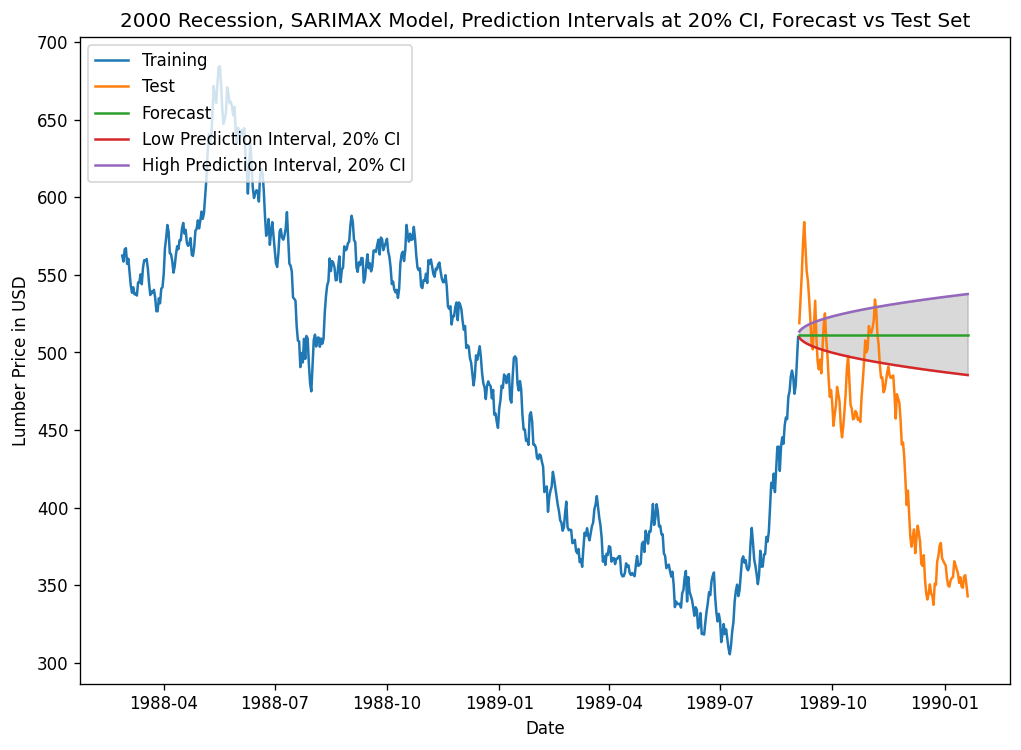

In [65]:
# Prediction assignment, predicted revenue column named
# Training, Test, and Predicted data plotted together
# Code Reference (Matplotlib.pyplot.plot — Matplotlib 3.6.0 documentation, n.d.)

# -----Creating varible with forecast values
forecast = pd.DataFrame(model.predict(n_periods = 139),index=test.index)

# Naming forecast_revenue column in forecast variable
forecast.columns = ['forecast_prices']

# Establish plot parameters for Forecast

# Plot figure size
plt.figure(figsize=(10,7))

# Training data
plt.plot(train,label="Training")

# Annotate X-axis label
plt.xlabel('Date')

# Annotate Y-axis label
plt.ylabel('Lumber Price in USD')

# Annotate Plot Title
plt.title('2000 Recession, SARIMAX Model, Prediction Intervals at 20% CI, Forecast vs Test Set')

# Plot Test Data
plt.plot(test,label="Test")

# Plot Forecast Data
plt.plot(forecast,label="Forecast")

# Add Prediction Interval at 95% CI
plt.plot(low_pred,label='Low Prediction Interval, 20% CI')
plt.plot(high_pred,label='High Prediction Interval, 20% CI')
plt.fill_between(low_pred.index, low_pred['Low_Prediction'], high_pred['High_Prediction'], color='k', alpha=.15)

# Plot legend in upper lefthand corner
plt.legend(loc = 'upper left')


# Show Plot
plt.show()

# Is the null hypothesis Accepted or Rejected?

In [66]:
# Accept or reject the Null Hypothesis
# 2000 Recession we Accept the Null Hypothesis